In [136]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend as K
tf.compat.v1.experimental.output_all_intermediates(True)

In [137]:
tf.random.set_seed(36)

## Dataset

In [138]:
BASE_DIR_PATH = '../Datasets'
DATASET_FILE = os.path.join(BASE_DIR_PATH, '2016_2017_sto_nino_and_montalban_lag_6.csv')

In [139]:
df = pd.read_csv(DATASET_FILE)
df

,Unnamed: 0,month,day,hour,Station,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Waterlevel_t-1,Waterlevel_t-2,Waterlevel_t-3,Waterlevel_t-4,Waterlevel_t-5,Waterlevel_t-6
0,0,1,1,0,Montalban,0,1,2,0,0,21.03,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,0,Sto_Nino,0,1,2,0,0,12.18,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,1,1,Montalban,0,1,1,1,0,21.03,21.03,NaN,NaN,NaN,NaN,NaN
3,3,1,1,1,Sto_Nino,0,1,1,1,0,12.19,12.18,NaN,NaN,NaN,NaN,NaN
4,4,1,1,2,Montalban,1,1,1,0,1,21.03,21.03,21.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,12,31,21,Sto_Nino,0,0,0,0,0,12.44,12.44,12.44,12.44,12.44,12.44,12.44
35036,35036,12,31,22,Montalban,0,0,0,0,0,21.18,21.18,21.18,21.18,21.18,21.18,21.18
35037,35037,12,31,22,Sto_Nino,0,0,0,0,0,12.44,12.44,12.44,12.44,12.44,12.44,12.44
35038,35038,12,31,23,Montalban,0,0,0,0,0,21.18,21.18,21.18,21.18,21.18,21.18,21.18


In [140]:
df['Station'] = [1 if x == 'Sto_Nino' else 0 for x in df['Station']]
df

,Unnamed: 0,month,day,hour,Station,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Waterlevel_t-1,Waterlevel_t-2,Waterlevel_t-3,Waterlevel_t-4,Waterlevel_t-5,Waterlevel_t-6
0,0,1,1,0,0,0,1,2,0,0,21.03,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,0,1,0,1,2,0,0,12.18,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,1,1,0,0,1,1,1,0,21.03,21.03,NaN,NaN,NaN,NaN,NaN
3,3,1,1,1,1,0,1,1,1,0,12.19,12.18,NaN,NaN,NaN,NaN,NaN
4,4,1,1,2,0,1,1,1,0,1,21.03,21.03,21.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,12,31,21,1,0,0,0,0,0,12.44,12.44,12.44,12.44,12.44,12.44,12.44
35036,35036,12,31,22,0,0,0,0,0,0,21.18,21.18,21.18,21.18,21.18,21.18,21.18
35037,35037,12,31,22,1,0,0,0,0,0,12.44,12.44,12.44,12.44,12.44,12.44,12.44
35038,35038,12,31,23,0,0,0,0,0,0,21.18,21.18,21.18,21.18,21.18,21.18,21.18


In [141]:
X_data = df.drop(columns=['Unnamed: 0', 'Waterlevel'])
X_data = X_data.values
y_data = df['Waterlevel']
y_data = y_data.values

In [142]:
np.set_printoptions(suppress=True)

In [143]:
X_data

array([[ 1.  ,  1.  ,  0.  , ...,   nan,   nan,   nan],
       [ 1.  ,  1.  ,  0.  , ...,   nan,   nan,   nan],
       [ 1.  ,  1.  ,  1.  , ...,   nan,   nan,   nan],
       ...,
       [12.  , 31.  , 22.  , ..., 12.44, 12.44, 12.44],
       [12.  , 31.  , 23.  , ..., 21.18, 21.18, 21.18],
       [12.  , 31.  , 23.  , ..., 12.44, 12.44, 12.44]])

In [144]:
y_data

array([21.03, 12.18, 21.03, ..., 12.44, 21.18, 12.44])

In [145]:
n = len(df)

In [146]:
X_train, y_train = X_data[:int(0.5*n)], y_data[:int(0.5*n)]
X_val, y_val = X_data[int(0.5*n):int(0.75*n)], y_data[int(0.5*n):int(0.75*n)]
X_test, y_test = X_data[int(0.75*n):], y_data[int(0.75*n):]

In [147]:
X_train.shape

(17520, 15)

In [148]:
X_train = X_train[~np.isnan(X_train).any(axis=1)]
X_train

array([[ 1.  ,  1.  ,  6.  , ..., 21.03, 21.03, 21.03],
       [ 1.  ,  1.  ,  6.  , ..., 12.19, 12.19, 12.18],
       [ 1.  ,  1.  ,  7.  , ..., 21.03, 21.03, 21.03],
       ...,
       [12.  , 31.  , 22.  , ..., 12.53, 12.53, 12.53],
       [12.  , 31.  , 23.  , ..., 21.24, 21.22, 21.21],
       [12.  , 31.  , 23.  , ..., 12.53, 12.53, 12.53]])

In [149]:
X_train.shape

(17508, 15)

In [150]:
y_train = y_train[12:]
y_train.shape

(17508,)

In [151]:
X_val.shape

(8760, 15)

In [152]:
X_test.shape

(8760, 15)

## Evaluation Metrics

In [153]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [154]:
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Models and Training Loops

In [155]:
def create_train_dnn_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    # Create the model
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return model, history

In [156]:
def create_train_cnn_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    # Reshape input for 1D CNN
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    
    conv_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.Conv1D(filters=64, kernel_size=6, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    conv_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    conv_history = conv_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return conv_model, conv_history

In [157]:
def create_train_lstm_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    if len(X_train.shape) == 2:
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    if len(X_val.shape) == 2:
        X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
            
    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
        tf.keras.layers.Flatten(),  # Add Flatten layer to handle dimension mismatch
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    lstm_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    lstm_history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return lstm_model, lstm_history

## Training

In [158]:
dnn_model, dnn_history = create_train_dnn_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 3s 4ms/step - loss: 0.9557 - mean_squared_error: 0.9557 - NSE: 0.9489 - r_square: 0.9921 - val_loss: 0.0207 - val_mean_squared_error: 0.0207 - val_NSE: 0.9990 - val_r_square: 0.9992
Epoch 2/20
548/548 [==============================] - 1s 2ms/step - loss: 0.0596 - mean_squared_error: 0.0596 - NSE: 0.9968 - r_square: 0.9973 - val_loss: 0.0152 - val_mean_squared_error: 0.0152 - val_NSE: 0.9993 - val_r_square: 0.9997
Epoch 3/20
548/548 [==============================] - 1s 2ms/step - loss: 0.0587 - mean_squared_error: 0.0587 - NSE: 0.9969 - r_square: 0.9975 - val_loss: 0.0133 - val_mean_squared_error: 0.0133 - val_NSE: 0.9994 - val_r_square: 0.9996
Epoch 4/20
548/548 [==============================] - 1s 2ms/step - loss: 0.0585 - mean_squared_error: 0.0585 - NSE: 0.9969 - r_square: 0.9976 - val_loss: 0.0303 - val_mean_squared_error: 0.0303 - val_NSE: 0.9985 - val_r_square: 0.9995
Epoch 5/20
548/548 [==============================] - 1s

In [159]:
cnn_model, cnn_history = create_train_cnn_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 3s 3ms/step - loss: 2.8081 - mean_squared_error: 2.8081 - NSE: 0.8512 - r_square: 0.9853 - val_loss: 0.0130 - val_mean_squared_error: 0.0130 - val_NSE: 0.9994 - val_r_square: 0.9994
Epoch 2/20
548/548 [==============================] - 2s 3ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - NSE: 0.9967 - r_square: 0.9974 - val_loss: 0.0218 - val_mean_squared_error: 0.0218 - val_NSE: 0.9990 - val_r_square: 0.9993
Epoch 3/20
548/548 [==============================] - 1s 3ms/step - loss: 0.0585 - mean_squared_error: 0.0585 - NSE: 0.9969 - r_square: 0.9975 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - val_NSE: 0.9997 - val_r_square: 0.9998
Epoch 4/20
548/548 [==============================] - 2s 3ms/step - loss: 0.0603 - mean_squared_error: 0.0603 - NSE: 0.9968 - r_square: 0.9976 - val_loss: 0.0227 - val_mean_squared_error: 0.0227 - val_NSE: 0.9989 - val_r_square: 0.9991
Epoch 5/20
548/548 [==============================] - 1s

In [160]:
# Train the model
lstm_model, lstm_history = create_train_lstm_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 6s 4ms/step - loss: 15.5045 - mean_squared_error: 15.5045 - NSE: 0.1740 - r_square: 0.8715 - val_loss: 0.0892 - val_mean_squared_error: 0.0892 - val_NSE: 0.9955 - val_r_square: 0.9981
Epoch 2/20
548/548 [==============================] - 2s 4ms/step - loss: 0.1524 - mean_squared_error: 0.1524 - NSE: 0.9919 - r_square: 0.9933 - val_loss: 0.0531 - val_mean_squared_error: 0.0531 - val_NSE: 0.9973 - val_r_square: 0.9990
Epoch 3/20
548/548 [==============================] - 2s 4ms/step - loss: 0.1259 - mean_squared_error: 0.1259 - NSE: 0.9934 - r_square: 0.9947 - val_loss: 0.0460 - val_mean_squared_error: 0.0460 - val_NSE: 0.9977 - val_r_square: 0.9990
Epoch 4/20
548/548 [==============================] - 2s 3ms/step - loss: 0.1092 - mean_squared_error: 0.1092 - NSE: 0.9942 - r_square: 0.9954 - val_loss: 0.0312 - val_mean_squared_error: 0.0312 - val_NSE: 0.9985 - val_r_square: 0.9992
Epoch 5/20
548/548 [==============================] - 

## Predictions

In [161]:
X_test

array([[ 7.  ,  2.  , 12.  , ..., 21.29, 21.29, 21.29],
       [ 7.  ,  2.  , 12.  , ..., 11.95, 11.94, 11.92],
       [ 7.  ,  2.  , 13.  , ..., 21.28, 21.29, 21.29],
       ...,
       [12.  , 31.  , 22.  , ..., 12.44, 12.44, 12.44],
       [12.  , 31.  , 23.  , ..., 21.18, 21.18, 21.18],
       [12.  , 31.  , 23.  , ..., 12.44, 12.44, 12.44]])

In [162]:
X_test.shape

(8760, 15)

In [163]:
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_test_lstm

array([[[ 7.  ,  2.  , 12.  , ..., 21.29, 21.29, 21.29]],

       [[ 7.  ,  2.  , 12.  , ..., 11.95, 11.94, 11.92]],

       [[ 7.  ,  2.  , 13.  , ..., 21.28, 21.29, 21.29]],

       ...,

       [[12.  , 31.  , 22.  , ..., 12.44, 12.44, 12.44]],

       [[12.  , 31.  , 23.  , ..., 21.18, 21.18, 21.18]],

       [[12.  , 31.  , 23.  , ..., 12.44, 12.44, 12.44]]])

In [164]:
X_test_lstm.shape

(8760, 1, 15)

In [165]:
predictions = lstm_model(X_test_lstm)
predictions

<tf.Tensor: shape=(8760, 1), dtype=float32, numpy=
array([[21.253815],
       [11.925228],
       [21.243816],
       ...,
       [12.238977],
       [20.980179],
       [12.217776]], dtype=float32)>

In [166]:
predictions = np.array(predictions).reshape(-1)
predictions.shape

(8760,)

In [167]:
y_test, y_test.shape

(array([21.26, 11.89, 21.26, ..., 12.44, 21.18, 12.44]), (8760,))

In [168]:
sto_nino_test = y_test[1::2]
sto_nino_test

array([11.89, 11.87, 11.85, ..., 12.44, 12.44, 12.44])

In [169]:
sto_nino_pred = predictions[1::2]
sto_nino_pred

array([11.925228, 11.91297 , 11.898631, ..., 12.262503, 12.238977,
       12.217776], dtype=float32)

In [170]:
SS_res = np.sum(np.square(sto_nino_test - sto_nino_pred)) 
SS_tot = np.sum(np.square(sto_nino_test - np.mean(sto_nino_test))) 

sto_nino_nse =  1 - SS_res/SS_tot
sto_nino_nse

0.8278035962326972

In [171]:
sto_nino_mse = np.mean(np.square(sto_nino_test-sto_nino_pred))
sto_nino_mse

0.05346338061113419

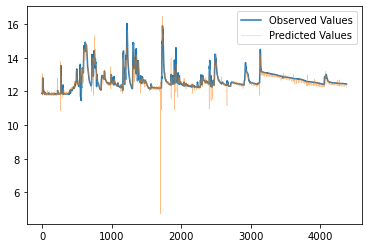

In [172]:
plt.plot(sto_nino_test, label='Observed Values')
plt.plot(sto_nino_pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

In [173]:
montalban_test = y_test[::2]
montalban_test

array([21.26, 21.26, 21.25, ..., 21.18, 21.18, 21.18])

In [174]:
montalban_pred = predictions[::2]
montalban_pred

array([21.253815, 21.243816, 21.238281, ..., 21.121384, 21.055893,
       20.980179], dtype=float32)

In [175]:
SS_res = np.sum(np.square(montalban_test - montalban_pred)) 
SS_tot = np.sum(np.square(montalban_test - np.mean(montalban_test))) 

montalban_nse =  1 - SS_res/SS_tot
montalban_nse

0.4929690697902219

In [176]:
montalban_mse = np.mean(np.square(montalban_test-montalban_pred))
montalban_mse

0.15417967141052996

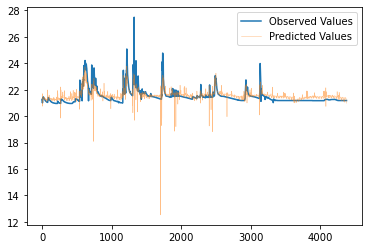

In [177]:
plt.plot(montalban_test, label='Observed Values')
plt.plot(montalban_pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

In [178]:
mse = (sto_nino_mse + montalban_mse)/2
nse = (sto_nino_nse + montalban_nse)/2

mse, nse

(0.10382152601083208, 0.6603863330114595)

In [179]:
np.savetxt('results/no_window_lag6_sto_nino.csv', sto_nino_pred, delimiter=',', fmt='%.4f')

In [180]:
np.savetxt('results/no_window_lag6_montalban.csv', montalban_pred, delimiter=',', fmt='%.4f')